In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

cf.go_offline()
%matplotlib inline

In [2]:
# read the csv file 
df_train = pd.read_csv('/Users/aneruthmohanasundaram/Documents/GitHub/Machine_Learning/Machine Learning/Logistic Regression/Datasets/titanic_train.csv')
df_train.head()
# SibSP --> number if sibilings and spouse on board 

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [3]:
df_train.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False   True  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [4]:
#  To create a heatmap 
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)
# this shows the missing information from the dataset we use 

&lt;AxesSubplot:&gt;

In [5]:
sns.set_style('whitegrid')
# To check who survived vs who not 
sns.countplot(x='Survived',data=df_train,hue='Pclass')

&lt;AxesSubplot:xlabel=&#39;Survived&#39;, ylabel=&#39;count&#39;&gt;

In [6]:
# To plot the age of the passengers using histogram 
sns.histplot(df_train['Age'].dropna(),kde=True,bins=20)
# or we can create a histogram using distplot 
# sns.distplot(df['Age'].dropna(),kde=True,bins=20)

&lt;AxesSubplot:xlabel=&#39;Age&#39;, ylabel=&#39;Count&#39;&gt;

&lt;AxesSubplot:xlabel=&#39;SibSp&#39;, ylabel=&#39;count&#39;&gt;

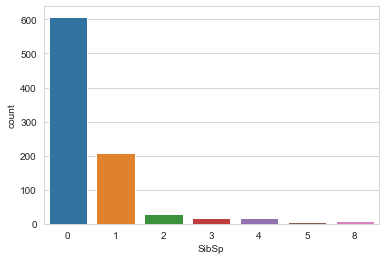

In [7]:
# to count hte Sibsp 
sns.countplot(x='SibSp',data=df_train)

In [8]:
# to create a histogram for the fare column 
df_train['Fare'].hist(bins=40,figsize=(10,4))

&lt;AxesSubplot:&gt;

In [9]:
# to create a histogram for the fare column using cufflinks 
df_train['Fare'].iplot(kind='hist')

In [24]:
############################################################# Cleaning the data ###########################################################

In [10]:
# To check the average age 
px.box(df_train,x='Pclass',y='Age').show()

In [11]:
# Function to appy avg age  

def impute(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):

        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

df_train['Age'] = df_train[['Age','Pclass']].apply(impute,axis=1)

&lt;AxesSubplot:&gt;

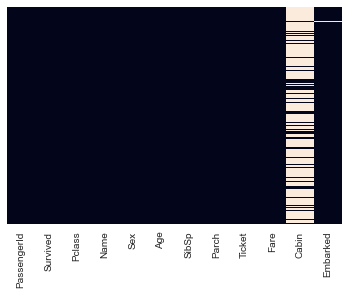

In [12]:
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [13]:
# since we have too much of missed values in cabin column we can drop that column from the dataset 
df_train.drop('Cabin',inplace=True,axis=1)
# To check the head after droping the cabin column 
df_train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S

&lt;AxesSubplot:&gt;

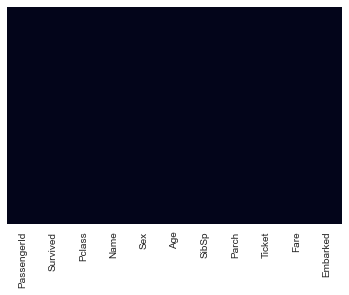

In [14]:
# Checking the missed data again by runnig the heatmap 
df_train.dropna(inplace=True)
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False)

In [15]:
################################################## Creating a categorical dummy variables using pandas ####################################

sex = pd.get_dummies(df_train['Sex'],drop_first=True)
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)
df_train = pd.concat([df_train,sex,embark],axis=1)

In [16]:
# dropping unwanted columns 
df_train.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)
df_train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S
0            1         0       3  22.0      1      0   7.2500     1  0  1
1            2         1       1  38.0      1      0  71.2833     0  0  0
2            3         1       3  26.0      0      0   7.9250     0  0  1
3            4         1       1  35.0      1      0  53.1000     0  0  1
4            5         0       3  35.0      0      0   8.0500     1  0  1

In [17]:
pclass = pd.get_dummies(df_train['Pclass'],drop_first=True)
df_train = pd.concat([df_train,pclass],axis=1)

In [18]:
df_train.head()

PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  male  Q  S  2  \
0            1         0       3  22.0      1      0   7.2500     1  0  1  0   
1            2         1       1  38.0      1      0  71.2833     0  0  0  0   
2            3         1       3  26.0      0      0   7.9250     0  0  1  0   
3            4         1       1  35.0      1      0  53.1000     0  0  1  0   
4            5         0       3  35.0      0      0   8.0500     1  0  1  0   

   3  
0  1  
1  0  
2  1  
3  0  
4  1

In [19]:
df_train.drop(['Pclass'],axis=1,inplace=True)
df_train.head()

PassengerId  Survived   Age  SibSp  Parch     Fare  male  Q  S  2  3
0            1         0  22.0      1      0   7.2500     1  0  1  0  1
1            2         1  38.0      1      0  71.2833     0  0  0  0  0
2            3         1  26.0      0      0   7.9250     0  0  1  0  1
3            4         1  35.0      1      0  53.1000     0  0  1  0  0
4            5         0  35.0      0      0   8.0500     1  0  1  0  1

In [20]:
####################################################### Predicting the model ##############################################################

In [29]:
# Split the data into two columns 
X = df_train.drop('Survived',axis=1)
y = df_train['Survived']

In [30]:
X_test, X_train, y_test, y_train = train_test_split(X,y,test_size=0.3,random_state=101)

In [31]:
lm = LogisticRegression()

In [32]:
lm.fit(X_train,y_train)

LogisticRegression()

In [33]:
pre = lm.predict(X_test)

In [35]:
 ##### Evaluating the model 
print(classification_report(y_test,pre))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84       386
           1       0.76      0.69      0.72       236

    accuracy                           0.80       622
   macro avg       0.79      0.78      0.78       622
weighted avg       0.80      0.80      0.80       622



In [38]:
# To import the confusion matrics instead of classification report 
print(confusion_matrix(y_test,pre))

[[333  53]
 [ 72 164]]
